In [22]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

# Load Model    

In [23]:
# Load the model
model = keras.models.load_model('fitmotion_model.keras')

c:\ProgramData\miniconda3\envs\tf_testing\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Loading The Data

In [24]:
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

In [25]:
# Load testing data
data_url = 'android_data/testing.csv'
df = pd.read_csv(data_url)
# df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Z,User Acceleration Y
0,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.046497,0.022184,-0.000053,0.009183,0.008119,0.021840
1,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.046497,0.022184,-0.000053,0.009183,0.008119,0.021840
2,-0.000000,-0.000000,0.000000,0.662494,0.817213,-0.043396,0.046497,0.022184,-0.000053,0.009183,0.008119,0.021840
3,-0.000000,-0.000000,0.000000,0.662494,0.817213,-0.043396,0.037779,0.004075,0.000132,0.009210,0.007803,0.021775
4,-0.000000,-0.000000,0.000000,0.662494,0.817213,-0.043396,0.037779,0.004075,0.000132,0.009210,0.007803,0.021775
...,...,...,...,...,...,...,...,...,...,...,...,...
501,2.868987,-12.716830,-0.369266,0.629944,0.831149,-0.009957,1.157341,0.814021,0.004841,0.008376,0.009440,0.022843
502,2.922138,-11.691698,-0.355613,0.617939,0.835282,-0.022940,1.157341,0.814021,0.004841,0.008376,0.009440,0.022843
503,2.922138,-11.691698,-0.355613,0.617939,0.835282,-0.022940,2.644520,-0.699478,0.012057,0.008376,0.009440,0.022843
504,2.922138,-11.691698,-0.355613,0.617939,0.835282,-0.022940,2.644520,-0.699478,0.012057,0.008100,0.021495,0.022680


In [26]:
# data comparison
# Load testing data
data_url_c = 'dataset/sit_13/sub_1.csv'
dfc = pd.read_csv(data_url_c)
dfc.drop('Unnamed: 0', axis=1, inplace=True)
dfc

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0.351138,-0.416302,-0.098023,0.314588,0.404381,-0.858784,-0.003655,0.009577,-0.000234,0.000094,0.000252,-0.006954
1,0.351219,-0.416372,-0.098025,0.314649,0.404445,-0.858732,-0.007937,0.007457,0.000807,-0.001309,0.002262,-0.010348
2,0.351145,-0.416497,-0.098045,0.314567,0.404560,-0.858708,-0.007960,-0.001053,-0.002387,-0.002174,0.000012,-0.006664
3,0.350849,-0.416695,-0.098148,0.314286,0.404740,-0.858726,-0.000521,-0.006411,-0.001261,0.001693,0.009216,-0.011575
4,0.350859,-0.416863,-0.098022,0.314271,0.404894,-0.858658,-0.001613,-0.004306,0.006206,0.005767,0.007490,-0.008926
...,...,...,...,...,...,...,...,...,...,...,...,...
10287,0.377830,-0.366861,0.131685,0.344357,0.358687,-0.867619,-0.008201,-0.002056,-0.032352,0.000004,0.007707,-0.003506
10288,0.377431,-0.367543,0.131037,0.343920,0.359324,-0.867528,-0.013541,-0.009469,-0.038790,-0.002688,0.006063,0.003011
10289,0.376842,-0.368708,0.130356,0.343255,0.360411,-0.867341,-0.002946,-0.016997,-0.030162,0.001548,0.019090,-0.007339
10290,0.376216,-0.369163,0.129790,0.342652,0.360835,-0.867403,0.021542,-0.017126,-0.019309,0.004180,0.016942,-0.019789


In [27]:
# drop first 20 rows
df.drop(df.head(20).index, inplace=True)

# Preprocessing Data

In [28]:
# Prepare the data
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [29]:
from scipy.stats import mode

def sequence_generator(x, length, stride):
    seq_x = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        seq_x.append(input_sequence)
    return np.array(seq_x)

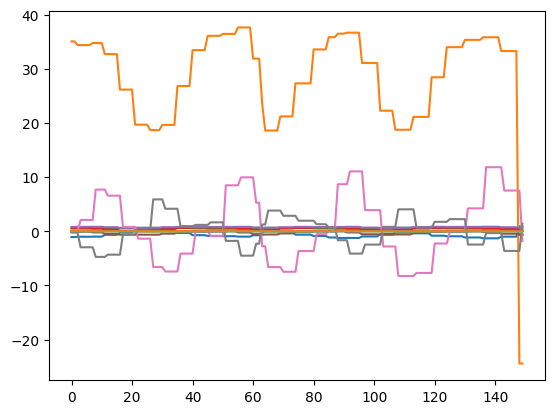

In [30]:
# Checking data
import matplotlib.pyplot as plt

tx = sequence_generator(df, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(tx[0])
plt.show()

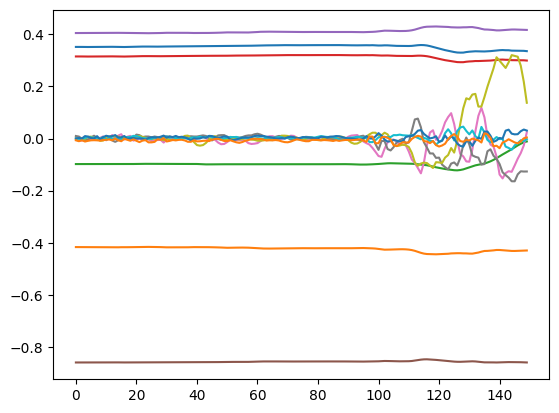

In [31]:
txc = sequence_generator(dfc, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(txc[0])
plt.show()

# Prediction

In [32]:
# Predict the data
y_pred = model.predict(tx)

# Get the most frequent label
y_pred = np.argmax(y_pred, axis=1)
y_pred = mode(y_pred)[0]
labels[y_pred]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000022A222CDF30> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


'dws'